### From a URL create a Dataframe

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import requests
from tqdm.notebook import tqdm
import random

In [2]:
url = "https://www.billboard.com/charts/hot-100/"

In [3]:
top100 = requests.get(url)

In [4]:
top100.status_code

200

### Search for the songs in the URL

In [5]:
soup=BeautifulSoup(top100.content,'html.parser')

In [6]:
soup.select('h3.c-title.a-no-trucate')[0].text

'\nEasy On Me\n'

In [7]:
top100=len(soup.select('h3.c-title.a-no-trucate'))

In [8]:
top100

100

In [9]:
index = soup.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)

In [10]:
index

'Easy On Me'

### Search for the artists in the URL

In [11]:
soup.select('span.c-label.a-no-trucate')[0].get_text(strip=True)

'Adele'

In [12]:
soup.select('span.c-label.a-no-trucate')[99].get_text(strip=True)

'The Weeknd'

### Create a DataFrame

In [13]:
title = []
artist = []

In [14]:
for i in tqdm(range(top100)):
    title.append(soup.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artist.append(soup.select('span.c-label.a-no-trucate')[i].get_text(strip=True))

  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
songs_top100=pd.DataFrame({'Title':title,'Artist':artist})

In [16]:
songs_top100

,Title,Artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,All Too Well (Taylor's Version),Taylor Swift
4,Oh My God,Adele
...,...,...
95,Too Easy,Gunna & Future
96,Escape Plan,Travis Scott
97,Who's In Your Head,Jonas Brothers
98,Jugaste y Sufri,Eslabon Armado Featuring DannyLux


In [17]:
songs_top100[92:]

,Title,Artist
92,Volvi,Aventura x Bad Bunny
93,Maybach,42 Dugg Featuring Future
94,Baddest,"Yung Bleu, Chris Brown & 2 Chainz"
95,Too Easy,Gunna & Future
96,Escape Plan,Travis Scott
97,Who's In Your Head,Jonas Brothers
98,Jugaste y Sufri,Eslabon Armado Featuring DannyLux
99,Take My Breath,The Weeknd


### Create a prototype where:
- The user can ask for one song and see if its in the playlist Top hot 100 songs
- Returns a new song if the first one is in the playlist

In [18]:
song= input("Give us a song name to get a recommendation!: ")

Give us a song name to get a recommendation!: stay


In [19]:
check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]

In [20]:
index = check.index.tolist()

In [21]:
def recommendation_engine():
    recommendation_engine()

In [22]:
song= input("Give us a song name to get a recommendation!: ")

check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]
index = check.index.tolist()

if len(index) == 0:
    print("This song is not on the Top 100 hot playlist! ")
else:
    answer = input("Do you mean " + songs_top100.Title[index].values[0] + " by " + songs_top100.Artist[index].values[0] + "?")

    if answer.lower() == 'yes':
        suggestion = songs_top100.sample().index.tolist()
        print("Nice! This is a hot song! You might also like " + songs_top100['Title'][suggestion].item() + " by " + songs_top100['Artist'][suggestion].item())

    else:
        print("that song is not in the playlist, try another song!")
    
    

Give us a song name to get a recommendation!: stay
Do you mean Stay by The Kid LAROI & Justin Bieber?yes
Nice! This is a hot song! You might also like Kiss Me More by Doja Cat Featuring SZA


# Import Spotify

In [23]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### Credentials

In [24]:
import getpass

client_id=str(getpass.getpass('client_id?'))
client_secret=str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [25]:
# embedding our getpass credentials in the access key

sp= spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

## Import playlists by genre
- I will first import a POP playlist

In [26]:
## https://open.spotify.com/playlist/37i9dQZF1DX1ngEVM0lKrb?si=332a03edd1db4135
## 37i9dQZF1DX1ngEVM0lKrb

In [27]:
pop_playlist = sp.user_playlist_tracks("Sarah Eringaard", "1HWoagBCUTlqigP88enL5r")

In [28]:
pop_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [29]:
len(pop_playlist['items'])

100

In [30]:
def get_playlist_tracks(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [31]:
results2=get_playlist_tracks("Sarah Eringaard", "1HWoagBCUTlqigP88enL5r")

In [32]:
len(results2)

473

In [33]:
results2[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [34]:
results2[0]['track']["uri"].rsplit(':',1)

['spotify:track', '04aAxqtGp5pv12UXAg4pkq']

In [35]:
results2[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [36]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results2

In [37]:
for r in results2:
    song_URI.append(r["track"]["uri"])

In [38]:
for r in results2: 
    song_ID.append(r["track"]["id"])

In [39]:
for r in results2: 
    song_name.append(r["track"]["name"])

In [40]:
for r in results2: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [41]:
import pandas as pd

In [42]:
playlist_pop_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})


In [43]:
playlist_pop_info

,song_name,song_ID,song_artist
0,Centuries,04aAxqtGp5pv12UXAg4pkq,Fall Out Boy
1,Counting Stars,6sy3LkhNFjJWlaeSMNwQ62,OneRepublic
2,Animals,16pwlVsypm4aDKMhXdOuXg,Maroon 5
3,Take Me to Church,0aOluBqXYd0rFSCsgDyAWX,Hozier
4,Rude,6RtPijgfPKROxEzTHNRiDp,MAGIC!
...,...,...,...
468,Jenny,2rpVmxAGGc18wpBREaoE0R,Studio Killers
469,I'm Gonna Be (500 Miles),66S14BkJDxgkYxLl5DCqOz,The Proclaimers
470,My Humps,19JdbdEwQI7bCxefMokZO8,Black Eyed Peas
471,I Just Wanna Run,3WLLJzllBEgPiSA0qd3BN3,The Downtown Fiction


### Add a new column for genre in playlist_pop_info

In [44]:
playlist_pop_info.insert(3, 'Genre', 'Pop') 

In [45]:
playlist_pop_info

,song_name,song_ID,song_artist,Genre
0,Centuries,04aAxqtGp5pv12UXAg4pkq,Fall Out Boy,Pop
1,Counting Stars,6sy3LkhNFjJWlaeSMNwQ62,OneRepublic,Pop
2,Animals,16pwlVsypm4aDKMhXdOuXg,Maroon 5,Pop
3,Take Me to Church,0aOluBqXYd0rFSCsgDyAWX,Hozier,Pop
4,Rude,6RtPijgfPKROxEzTHNRiDp,MAGIC!,Pop
...,...,...,...,...
468,Jenny,2rpVmxAGGc18wpBREaoE0R,Studio Killers,Pop
469,I'm Gonna Be (500 Miles),66S14BkJDxgkYxLl5DCqOz,The Proclaimers,Pop
470,My Humps,19JdbdEwQI7bCxefMokZO8,Black Eyed Peas,Pop
471,I Just Wanna Run,3WLLJzllBEgPiSA0qd3BN3,The Downtown Fiction,Pop


## Import playlists by genre
- I will import now a INDIE playlist

In [46]:
## https://open.spotify.com/playlist/7lnCgcTxLTTcOqvgoS80sC?si=923d97089cf041ea
## oceanify

In [47]:
indie_playlist = sp.user_playlist_tracks("oceanify", "7lnCgcTxLTTcOqvgoS80sC")

In [48]:
indie_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [49]:
len(indie_playlist['items'])

100

In [50]:
def get_playlist_tracks1(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [51]:
results3=get_playlist_tracks1("oceanify", "7lnCgcTxLTTcOqvgoS80sC")

In [52]:
len(results3)

170

In [53]:
results3[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [54]:
results3[0]['track']["uri"].rsplit(':',1)

['spotify:track', '3Wrjm47oTz2sjIgck11l5e']

In [55]:
results3[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [56]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results3

In [57]:
for r in results3:
    song_URI.append(r["track"]["uri"])
    
for r in results3: 
    song_ID.append(r["track"]["id"])
    
for r in results3: 
    song_name.append(r["track"]["name"])
    
for r in results3: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [58]:
playlist_indie_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})


In [59]:
playlist_indie_info

,song_name,song_ID,song_artist
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby
...,...,...,...
165,Maybe - Extended Version,5M9FFdvLfKPkORIRERHzKY,Elizabeth Cuite
166,Deja Vu,5PWT6FhFPn2E5dv5tUuqNE,Luvlee
167,One in a Million,0B2gr2o765XiWU6dGKmktU,Will Whisson
168,Comin’ Home (Stewart Sullivan Mix),49FulGQwWUrWVVB69TfHAr,Dominoe


### Add a new column for genre in playlist_indie_info

In [60]:
playlist_indie_info.insert(3, 'Genre', 'Indie') 

In [61]:
playlist_indie_info

,song_name,song_ID,song_artist,Genre
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...
165,Maybe - Extended Version,5M9FFdvLfKPkORIRERHzKY,Elizabeth Cuite,Indie
166,Deja Vu,5PWT6FhFPn2E5dv5tUuqNE,Luvlee,Indie
167,One in a Million,0B2gr2o765XiWU6dGKmktU,Will Whisson,Indie
168,Comin’ Home (Stewart Sullivan Mix),49FulGQwWUrWVVB69TfHAr,Dominoe,Indie


## Import playlists by genre
- I will import now a ROCK playlist

In [62]:
## https://open.spotify.com/playlist/37i9dQZF1DWXRqgorJj26U?si=6870797da01948f7
## Spotify

In [63]:
rock_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DWXRqgorJj26U")

In [64]:
rock_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [65]:
len(rock_playlist['items'])

100

In [66]:
def get_playlist_tracks2(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [67]:
results4=get_playlist_tracks2("Spotify", "37i9dQZF1DWXRqgorJj26U")

In [68]:
len(results4)

166

In [69]:
results4[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [70]:
results4[0]['track']["uri"].rsplit(':',1)

['spotify:track', '57JVGBtBLCfHw2muk5416J']

In [71]:
results4[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [72]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results4

In [73]:
for r in results4:
    song_URI.append(r["track"]["uri"])
    
for r in results4: 
    song_ID.append(r["track"]["id"])
    
for r in results4: 
    song_name.append(r["track"]["name"])
    
for r in results4: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [74]:
playlist_rock_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [75]:
playlist_rock_info

,song_name,song_ID,song_artist
0,Another One Bites The Dust - Remastered 2011,57JVGBtBLCfHw2muk5416J,Queen
1,Paradise City,3YBZIN3rekqsKxbJc9FZko,Guns N' Roses
2,Black Dog - Remaster,3qT4bUD1MaWpGrTwcvguhb,Led Zeppelin
3,Highway to Hell,2zYzyRzz6pRmhPzyfMEC8s,AC/DC
4,Dream On,5MxNLUsfh7uzROypsoO5qe,Aerosmith
...,...,...,...
161,Ramble On - 1990 Remaster,3MODES4TNtygekLl146Dxd,Led Zeppelin
162,Crazy On You,5zH710lFSLtkHbMkslLDjR,Heart
163,Foreplay / Long Time,5UYPZZDQfpCE7A0FDDqv4k,Boston
164,My Generation - Mono Version,45s88Xopo6KvHc0PQ05aGg,The Who


### Add a new column for genre in playlist_rock_info

In [76]:
playlist_rock_info.insert(3, 'Genre', 'Rock') 

In [77]:
playlist_rock_info

,song_name,song_ID,song_artist,Genre
0,Another One Bites The Dust - Remastered 2011,57JVGBtBLCfHw2muk5416J,Queen,Rock
1,Paradise City,3YBZIN3rekqsKxbJc9FZko,Guns N' Roses,Rock
2,Black Dog - Remaster,3qT4bUD1MaWpGrTwcvguhb,Led Zeppelin,Rock
3,Highway to Hell,2zYzyRzz6pRmhPzyfMEC8s,AC/DC,Rock
4,Dream On,5MxNLUsfh7uzROypsoO5qe,Aerosmith,Rock
...,...,...,...,...
161,Ramble On - 1990 Remaster,3MODES4TNtygekLl146Dxd,Led Zeppelin,Rock
162,Crazy On You,5zH710lFSLtkHbMkslLDjR,Heart,Rock
163,Foreplay / Long Time,5UYPZZDQfpCE7A0FDDqv4k,Boston,Rock
164,My Generation - Mono Version,45s88Xopo6KvHc0PQ05aGg,The Who,Rock


## Import playlists by genre
- I will import now a TROPICAL HOUSE playlist

In [78]:
## https://open.spotify.com/playlist/37i9dQZF1DX0AMssoUKCz7?si=8509345b0f7b4117
## Spotify

In [79]:
tropical_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX0AMssoUKCz7")

In [80]:
tropical_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [81]:
len(tropical_playlist['items'])

100

In [82]:
def get_playlist_tracks3(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [83]:
results5=get_playlist_tracks3("Spotify", "37i9dQZF1DX0AMssoUKCz7")

In [84]:
len(results5)

200

In [85]:
results5[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [86]:
results5[0]['track']["uri"].rsplit(':',1)

['spotify:track', '4C020pCjavabKAGmjZZRmh']

In [87]:
results5[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [88]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results5

In [89]:
for r in results5:
    song_URI.append(r["track"]["uri"])
    
for r in results5: 
    song_ID.append(r["track"]["id"])
    
for r in results5: 
    song_name.append(r["track"]["name"])
    
for r in results5: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [90]:
playlist_tropical_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [91]:
playlist_tropical_info

,song_name,song_ID,song_artist
0,Ride,4C020pCjavabKAGmjZZRmh,Madism
1,Tear Me Down (feat. Philip Rustad),71UYuIZf0TeXAjyy72COVr,Davai
2,Summer Feeling,793OuR8rJ0zpVp708ONAxO,Matoma
3,Love Me Now (feat. Zoe Wees),1c1sdxrYLIiuJOlE7PPttb,Kygo
4,Call On Me (feat. Georgia Ku),3pBv3LfvfPft2TqHleqKHo,Sam Feldt
...,...,...,...
195,The Last Ones Standing,4X6wMQec2NHdBhEGUwqUFV,Tep No
196,I Love It When You Cry (Moxoki) - Boehm Remix,0UhyQ3rTGmSf64TwmKLu3i,Steve Aoki
197,Safe and Sound - Radio Edit,340sV0G2e1h5jWsMyDRmc9,NLSN
198,Catch & Release (Deepend remix),4FqrgfKej2jv450UFW6PP8,Matt Simons


### Add a new column for genre in playlist_tropical_info

In [92]:
playlist_tropical_info.insert(3, 'Genre', 'Tropical') 

In [93]:
playlist_tropical_info

,song_name,song_ID,song_artist,Genre
0,Ride,4C020pCjavabKAGmjZZRmh,Madism,Tropical
1,Tear Me Down (feat. Philip Rustad),71UYuIZf0TeXAjyy72COVr,Davai,Tropical
2,Summer Feeling,793OuR8rJ0zpVp708ONAxO,Matoma,Tropical
3,Love Me Now (feat. Zoe Wees),1c1sdxrYLIiuJOlE7PPttb,Kygo,Tropical
4,Call On Me (feat. Georgia Ku),3pBv3LfvfPft2TqHleqKHo,Sam Feldt,Tropical
...,...,...,...,...
195,The Last Ones Standing,4X6wMQec2NHdBhEGUwqUFV,Tep No,Tropical
196,I Love It When You Cry (Moxoki) - Boehm Remix,0UhyQ3rTGmSf64TwmKLu3i,Steve Aoki,Tropical
197,Safe and Sound - Radio Edit,340sV0G2e1h5jWsMyDRmc9,NLSN,Tropical
198,Catch & Release (Deepend remix),4FqrgfKej2jv450UFW6PP8,Matt Simons,Tropical


## Import playlists by genre
- I will import now a HIPHOP playlist

In [94]:
## https://open.spotify.com/playlist/33I6RpefRQcRh69xEczaKT?si=8bc85c31fb894e45
## Leon Bouw

In [95]:
hiphop_playlist = sp.user_playlist_tracks("Leon Bouw", "33I6RpefRQcRh69xEczaKT")

In [96]:
hiphop_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [97]:
len(hiphop_playlist['items'])

100

In [98]:
def get_playlist_tracks4(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [99]:
results6=get_playlist_tracks3("Leon Bouw", "33I6RpefRQcRh69xEczaKT")

In [100]:
len(results6)

265

In [101]:
results6[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [102]:
results6[0]['track']["uri"].rsplit(':',1)

['spotify:track', '1YrHyDbH17btvI2rFTkbCQ']

In [103]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results6

In [104]:
for r in results6:
    song_URI.append(r["track"]["uri"])
    
for r in results6: 
    song_ID.append(r["track"]["id"])
    
for r in results6: 
    song_name.append(r["track"]["name"])
    
for r in results6: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [105]:
playlist_hiphop_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [106]:
playlist_hiphop_info

,song_name,song_ID,song_artist
0,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,Snoop Dogg
1,How We Do,6mZcNu9i8uhOYMiEAyEx81,The Game
2,No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,Waka Flocka Flame
3,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,Kanye West
4,99 Problems,4HsL5A46wa0O2jQ0ngj3H7,JAY-Z
...,...,...,...
260,Yo Sassy Ways,0J1siBLQBHYgYKeFgu7RAY,Warren G
261,Cisco Kid,0CJ3Y3V6UQn5X7IjXDO3IO,Redman
262,Woah! - Radio Mix,5fZjSIReYPJIPwpvrsyW3o,Black Rob
263,I Don't Wanna Care Right Now (feat. MDMA),5yhXLtQL9waNMjgkl8MsMP,Lupe Fiasco


### Add a new column for genre in playlist_hiphop_info

In [107]:
playlist_hiphop_info.insert(3, 'Genre', 'HipHop') 

In [108]:
playlist_hiphop_info

,song_name,song_ID,song_artist,Genre
0,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,Snoop Dogg,HipHop
1,How We Do,6mZcNu9i8uhOYMiEAyEx81,The Game,HipHop
2,No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,Waka Flocka Flame,HipHop
3,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,Kanye West,HipHop
4,99 Problems,4HsL5A46wa0O2jQ0ngj3H7,JAY-Z,HipHop
...,...,...,...,...
260,Yo Sassy Ways,0J1siBLQBHYgYKeFgu7RAY,Warren G,HipHop
261,Cisco Kid,0CJ3Y3V6UQn5X7IjXDO3IO,Redman,HipHop
262,Woah! - Radio Mix,5fZjSIReYPJIPwpvrsyW3o,Black Rob,HipHop
263,I Don't Wanna Care Right Now (feat. MDMA),5yhXLtQL9waNMjgkl8MsMP,Lupe Fiasco,HipHop


## Import playlists by genre
- I will import now a LATIN playlist

In [109]:
## https://open.spotify.com/playlist/4DLmZ0UM8TH0UXRfI0Mvu6?si=138328e1e1b44091
## MiKeL

In [110]:
latin_playlist = sp.user_playlist_tracks("MiKeL", "4DLmZ0UM8TH0UXRfI0Mvu6")

In [111]:
latin_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [112]:
len(latin_playlist['items'])

100

In [113]:
def get_playlist_tracks5(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [114]:
results7=get_playlist_tracks5("MiKeL", "4DLmZ0UM8TH0UXRfI0Mvu6")

In [115]:
len(results7)

269

In [116]:
results7[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [117]:
results7[0]['track']["uri"].rsplit(':',1)

['spotify:track', '1ZcrHpBbILPNfhBtPhQVHh']

In [118]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results7

In [119]:
for r in results7:
    song_URI.append(r["track"]["uri"])
    
for r in results7: 
    song_ID.append(r["track"]["id"])
    
for r in results7: 
    song_name.append(r["track"]["name"])
    
for r in results7: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [120]:
playlist_latin_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [121]:
playlist_latin_info

,song_name,song_ID,song_artist
0,Se Menea,1ZcrHpBbILPNfhBtPhQVHh,Don Omar
1,Una Vaina Loca,2qEoAz0i6yEz5dPggABcLH,Fuego
2,Señor Juez,2PH533J1xudlfZ5GaHAdVX,Ozuna
3,Ella - Remix,7iHHlCbsFou5DZSW5HCPfs,Boza
4,Unfollow,6GsD646HrIDJJpzoY9T1Rt,Duki
...,...,...,...
264,Ay Vamos,6Ges5C2IE738iJh4HyQizQ,J Balvin
265,Love Not War (The Tampa Beat),4Lt6GXGzYsa1tgkv3nGSTm,Jason Derulo
266,BICHOTA,7vrJn5hDSXRmdXoR30KgF1,KAROL G
267,Hey DJ,1XgpK29CGGjZnxPYkiRbh4,CNCO


### Add a new column for genre in playlist_latin_info

In [122]:
playlist_latin_info.insert(3, 'Genre', 'Latin') 

In [123]:
playlist_latin_info

,song_name,song_ID,song_artist,Genre
0,Se Menea,1ZcrHpBbILPNfhBtPhQVHh,Don Omar,Latin
1,Una Vaina Loca,2qEoAz0i6yEz5dPggABcLH,Fuego,Latin
2,Señor Juez,2PH533J1xudlfZ5GaHAdVX,Ozuna,Latin
3,Ella - Remix,7iHHlCbsFou5DZSW5HCPfs,Boza,Latin
4,Unfollow,6GsD646HrIDJJpzoY9T1Rt,Duki,Latin
...,...,...,...,...
264,Ay Vamos,6Ges5C2IE738iJh4HyQizQ,J Balvin,Latin
265,Love Not War (The Tampa Beat),4Lt6GXGzYsa1tgkv3nGSTm,Jason Derulo,Latin
266,BICHOTA,7vrJn5hDSXRmdXoR30KgF1,KAROL G,Latin
267,Hey DJ,1XgpK29CGGjZnxPYkiRbh4,CNCO,Latin


## Import playlists by genre
- I will import now a SPANISH playlist

In [124]:
## https://open.spotify.com/playlist/1oUJ31mriViDmfMliMXRRZ?si=c25b5ae7a9d546cb
## Gr Fausto

In [125]:
spanish_playlist = sp.user_playlist_tracks("Gr Fausto", "1oUJ31mriViDmfMliMXRRZ")

In [126]:
spanish_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [127]:
len(spanish_playlist['items'])

100

In [128]:
def get_playlist_tracks6(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [129]:
results8=get_playlist_tracks6("Gr Fausto", "1oUJ31mriViDmfMliMXRRZ")

In [130]:
len(results8)

597

In [131]:
results8[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [132]:
results8[0]['track']["uri"].rsplit(':',1)

['spotify:track', '3v1dCP3hk2djfWryqfp7sx']

In [133]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results8

In [134]:
for r in results8:
    song_URI.append(r["track"]["uri"])
    
for r in results8: 
    song_ID.append(r["track"]["id"])
    
for r in results8: 
    song_name.append(r["track"]["name"])
    
for r in results8: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [135]:
playlist_spanish_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [136]:
playlist_spanish_info

,song_name,song_ID,song_artist
0,Caminando por la vida,3v1dCP3hk2djfWryqfp7sx,Melendi
1,Soldadito marinero,0eVborSuxUeSg0meWYd9dZ,Fito y Fitipaldis
2,Walter Palmeras,58UxBSr2y1b7gun2Vjt8dg,Taburete
3,Caminito A Motel,3VptrSkImJN0c5KCEBHE65,Taburete
4,Amos del Piano Bar,5wnIjet6vh2BaIX2gl4Mgz,Taburete
...,...,...,...
592,Cuando Brille el Sol (with Manuel Espana),2T0hFOkypPat3w4K5mc7fc,Melocos
593,Yo no te pido la luna,1hI1st8dvPmr1S55XDkavG,Sergio Dalma
594,A Mi Manera,5yY2UPVQ9EBKBXh2dGtU6U,Siempre Asi
595,Sopa fría,1zLJEnxuZBgPbwMrDMiZAf,M-Clan


### Add a new column for genre in playlist_spanish_info

In [137]:
playlist_spanish_info.insert(3, 'Genre', 'Spanish') 

In [138]:
playlist_spanish_info

,song_name,song_ID,song_artist,Genre
0,Caminando por la vida,3v1dCP3hk2djfWryqfp7sx,Melendi,Spanish
1,Soldadito marinero,0eVborSuxUeSg0meWYd9dZ,Fito y Fitipaldis,Spanish
2,Walter Palmeras,58UxBSr2y1b7gun2Vjt8dg,Taburete,Spanish
3,Caminito A Motel,3VptrSkImJN0c5KCEBHE65,Taburete,Spanish
4,Amos del Piano Bar,5wnIjet6vh2BaIX2gl4Mgz,Taburete,Spanish
...,...,...,...,...
592,Cuando Brille el Sol (with Manuel Espana),2T0hFOkypPat3w4K5mc7fc,Melocos,Spanish
593,Yo no te pido la luna,1hI1st8dvPmr1S55XDkavG,Sergio Dalma,Spanish
594,A Mi Manera,5yY2UPVQ9EBKBXh2dGtU6U,Siempre Asi,Spanish
595,Sopa fría,1zLJEnxuZBgPbwMrDMiZAf,M-Clan,Spanish


## Import playlists by genre
- I will import now a JAZZ playlist

In [139]:
## https://open.spotify.com/playlist/37i9dQZF1DX0SM0LYsmbMT?si=a455c71c0ea24707
## Spotify

In [140]:
jazz_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX0SM0LYsmbMT")

In [141]:
jazz_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [142]:
len(jazz_playlist['items'])

100

In [143]:
def get_playlist_tracks7(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [144]:
results9=get_playlist_tracks7("Spotify", "37i9dQZF1DX0SM0LYsmbMT")

In [145]:
len(results9)

300

In [146]:
results9[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [147]:
results9[0]['track']["uri"].rsplit(':',1)

['spotify:track', '68XSHyQQlIhs6ytuHIr6Uo']

In [148]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results9

In [149]:
for r in results9:
    song_URI.append(r["track"]["uri"])
    
for r in results9: 
    song_ID.append(r["track"]["id"])
    
for r in results9: 
    song_name.append(r["track"]["name"])
    
for r in results9: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [150]:
playlist_jazz_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [151]:
playlist_jazz_info

,song_name,song_ID,song_artist
0,Memories,68XSHyQQlIhs6ytuHIr6Uo,Mr. Käfer
1,Above the Clouds,0ogIUn5t00tseKzRngQfnu,Oilix
2,Bubbles,3ocMyz1hZX5pl87L4xgadr,Glimlip
3,Soulsearching,7bKVWzUXNgcEdi32sECdD1,Hoffy Beats
4,Sad Emoji,1biA4kEJ8M2tPrWfwy9uID,Katashi Kaitō
...,...,...,...
295,Papp Papp,4U7ZN87fGLC7KpemBsT516,Madara
296,Life,3ObpboFzz9FoI7Kkv24WUp,Vincent Rayn
297,Lagoon,1xz1RiE7nVAeehBCXQsacj,Sátyr
298,visions,745AakO0aEufMDxDQjg0qb,damaa.beats


### Add a new column for genre in playlist_spanish_info

In [152]:
playlist_jazz_info.insert(3, 'Genre', 'Jazz') 

In [153]:
playlist_jazz_info

,song_name,song_ID,song_artist,Genre
0,Memories,68XSHyQQlIhs6ytuHIr6Uo,Mr. Käfer,Jazz
1,Above the Clouds,0ogIUn5t00tseKzRngQfnu,Oilix,Jazz
2,Bubbles,3ocMyz1hZX5pl87L4xgadr,Glimlip,Jazz
3,Soulsearching,7bKVWzUXNgcEdi32sECdD1,Hoffy Beats,Jazz
4,Sad Emoji,1biA4kEJ8M2tPrWfwy9uID,Katashi Kaitō,Jazz
...,...,...,...,...
295,Papp Papp,4U7ZN87fGLC7KpemBsT516,Madara,Jazz
296,Life,3ObpboFzz9FoI7Kkv24WUp,Vincent Rayn,Jazz
297,Lagoon,1xz1RiE7nVAeehBCXQsacj,Sátyr,Jazz
298,visions,745AakO0aEufMDxDQjg0qb,damaa.beats,Jazz


## Import playlists by genre
- I will import now a Deep House playlist

In [154]:
## https://open.spotify.com/playlist/37i9dQZF1DX2TRYkJECvfC?si=e54832a9a20e4451
## Spotify

In [155]:
deep_house_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX2TRYkJECvfC")

In [156]:
deep_house_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [157]:
len(deep_house_playlist['items'])

100

In [158]:
def get_playlist_tracks8(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [159]:
results10=get_playlist_tracks8("Spotify", "37i9dQZF1DX2TRYkJECvfC")

In [160]:
len(results10)

200

In [161]:
results10[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [162]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results10

In [163]:
for r in results10:
    song_URI.append(r["track"]["uri"])
    
for r in results10: 
    song_ID.append(r["track"]["id"])
    
for r in results10: 
    song_name.append(r["track"]["name"])
    
for r in results10: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [164]:
playlist_deep_house_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [165]:
playlist_deep_house_info

,song_name,song_ID,song_artist
0,Renaissance,1mqPLbDc8DCRlTuyF26ste,Honeydripper
1,Erase,1BbXlbs8pWeYI2yGpGhuzA,Ben Böhmer
2,Waves (feat. Grace Tither),6ymVxYG0UHqIjXmclbE1cu,BLOND:ISH
3,Designer Love - Short Version,5NfgFRdfNQ4HFVPGRoVMU6,MARIA Die RUHE
4,Renaissance - Manuel Riva Remix,6kiVi4iXhooHmaty1G5vV5,Maxim Lany
...,...,...,...
195,Robots With Soul Part 3 - Original Mix,0Q93Bly24xaWk0WcqruOuD,Android Cartel
196,Vutuka,5dW1pmxxlWlBcqUUGL6wE9,Lost Desert
197,What You Want,1RuMPMUxwdAZ0tMcaUwQiw,glue70
198,Faded Memory,30sWK9of3ll8689n12qV0b,Planète


### Add a new column for genre in playlist_deep_house_info

In [166]:
playlist_deep_house_info.insert(3, 'Genre', 'Deep House') 

In [167]:
playlist_deep_house_info

,song_name,song_ID,song_artist,Genre
0,Renaissance,1mqPLbDc8DCRlTuyF26ste,Honeydripper,Deep House
1,Erase,1BbXlbs8pWeYI2yGpGhuzA,Ben Böhmer,Deep House
2,Waves (feat. Grace Tither),6ymVxYG0UHqIjXmclbE1cu,BLOND:ISH,Deep House
3,Designer Love - Short Version,5NfgFRdfNQ4HFVPGRoVMU6,MARIA Die RUHE,Deep House
4,Renaissance - Manuel Riva Remix,6kiVi4iXhooHmaty1G5vV5,Maxim Lany,Deep House
...,...,...,...,...
195,Robots With Soul Part 3 - Original Mix,0Q93Bly24xaWk0WcqruOuD,Android Cartel,Deep House
196,Vutuka,5dW1pmxxlWlBcqUUGL6wE9,Lost Desert,Deep House
197,What You Want,1RuMPMUxwdAZ0tMcaUwQiw,glue70,Deep House
198,Faded Memory,30sWK9of3ll8689n12qV0b,Planète,Deep House


## Import playlists by genre
- I will import now a Disney playlist

In [168]:
## https://open.spotify.com/playlist/37i9dQZF1DX8C9xQcOrE6T?si=d2057893dbca4cb2
## Spotify

In [169]:
disney_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX8C9xQcOrE6T")

In [170]:
disney_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [171]:
len(disney_playlist['items'])

100

In [172]:
def get_playlist_tracks9(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [173]:
results11=get_playlist_tracks9("Spotify", "37i9dQZF1DX8C9xQcOrE6T")

In [174]:
len(results11)

102

In [175]:
results11[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [176]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results11

In [177]:
for r in results11:
    song_URI.append(r["track"]["uri"])
    
for r in results11: 
    song_ID.append(r["track"]["id"])
    
for r in results11: 
    song_name.append(r["track"]["name"])
    
for r in results11: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [178]:
playlist_disney_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [179]:
playlist_disney_info

,song_name,song_ID,song_artist
0,Into the Unknown,3Z0oQ8r78OUaHvGPiDBR3W,Idina Menzel
1,How Far I'll Go,6mb6lVLNrcUgLnEN8QnDJd,Auli'i Cravalho
2,"Colombia, Mi Encanto",2Q5q1q01KOdHt5fM00WUJ8,Carlos Vives
3,Un Poco Loco,0OFknyqxmSQ42SoKxWVTok,Anthony Gonzalez
4,The Family Madrigal,4b1yxSdlumA8N4fEk4UOZp,Stephanie Beatriz
...,...,...,...
97,"When Can I See You Again? - From ""Wreck-It Ral...",5ZkAx8zjLiSs1nMmBwJoZS,Owl City
98,Zero,4Bi2qsF5AWin93USPh5fQK,Imagine Dragons
99,Spirit,38SueFAjT6jtFneyoQamYi,Beyoncé
100,In This Place,2cOE7d35PyfAh9M7DglPk0,Julia Michaels


### Add a new column for genre in playlist_disney_info

In [180]:
playlist_disney_info.insert(3, 'Genre', 'Disney') 

In [181]:
playlist_disney_info

,song_name,song_ID,song_artist,Genre
0,Into the Unknown,3Z0oQ8r78OUaHvGPiDBR3W,Idina Menzel,Disney
1,How Far I'll Go,6mb6lVLNrcUgLnEN8QnDJd,Auli'i Cravalho,Disney
2,"Colombia, Mi Encanto",2Q5q1q01KOdHt5fM00WUJ8,Carlos Vives,Disney
3,Un Poco Loco,0OFknyqxmSQ42SoKxWVTok,Anthony Gonzalez,Disney
4,The Family Madrigal,4b1yxSdlumA8N4fEk4UOZp,Stephanie Beatriz,Disney
...,...,...,...,...
97,"When Can I See You Again? - From ""Wreck-It Ral...",5ZkAx8zjLiSs1nMmBwJoZS,Owl City,Disney
98,Zero,4Bi2qsF5AWin93USPh5fQK,Imagine Dragons,Disney
99,Spirit,38SueFAjT6jtFneyoQamYi,Beyoncé,Disney
100,In This Place,2cOE7d35PyfAh9M7DglPk0,Julia Michaels,Disney


## Import playlists by genre
- I will import now a Techno playlist

In [182]:
## https://open.spotify.com/playlist/1ttMvmcjWe9JKZybeYjtnU?si=15ee0122f19449ee
## Tunefullymusic

In [183]:
techno_playlist = sp.user_playlist_tracks("Tunefullymusic", "1ttMvmcjWe9JKZybeYjtnU")

In [184]:
techno_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [185]:
len(techno_playlist['items'])

100

In [186]:
def get_playlist_tracks10(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [187]:
results12=get_playlist_tracks10("Spotify", "1ttMvmcjWe9JKZybeYjtnU")

In [188]:
len(results12)

1021

In [189]:
results12[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [190]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results12

In [191]:
for r in results12:
    song_URI.append(r["track"]["uri"])
    
for r in results12: 
    song_ID.append(r["track"]["id"])
    
for r in results12: 
    song_name.append(r["track"]["name"])
    
for r in results12: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [192]:
playlist_techno_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [193]:
playlist_techno_info

,song_name,song_ID,song_artist
0,Gimme Some,6170lJSBtiM5trzOtHtdD2,Weval
1,To Let Myself Go,4IQgbTjXZfINWOS5TKL6T0,The Avener
2,In the Morning,01wpPOPqQ3XyS6hBN00HfK,ZHU
3,Love Me - 4ЯR & Cutneck Remix,7wBsua0Fr50vOEHzABrlsc,Damian Spider
4,West Coast,5Y6nVaayzitvsD5F7nr3DV,Lana Del Rey
...,...,...,...
1016,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn
1017,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation
1018,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea
1019,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage


### Add a new column for genre in playlist_disney_info

In [194]:
playlist_techno_info.insert(3, 'Genre', 'Techno') 

In [195]:
playlist_techno_info

,song_name,song_ID,song_artist,Genre
0,Gimme Some,6170lJSBtiM5trzOtHtdD2,Weval,Techno
1,To Let Myself Go,4IQgbTjXZfINWOS5TKL6T0,The Avener,Techno
2,In the Morning,01wpPOPqQ3XyS6hBN00HfK,ZHU,Techno
3,Love Me - 4ЯR & Cutneck Remix,7wBsua0Fr50vOEHzABrlsc,Damian Spider,Techno
4,West Coast,5Y6nVaayzitvsD5F7nr3DV,Lana Del Rey,Techno
...,...,...,...,...
1016,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn,Techno
1017,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation,Techno
1018,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea,Techno
1019,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage,Techno


## Joining all the dataframes into 1

In [196]:
frames=[playlist_indie_info, playlist_pop_info, playlist_rock_info, 
        playlist_tropical_info, playlist_hiphop_info
       ,playlist_latin_info,playlist_spanish_info,
       playlist_jazz_info, playlist_deep_house_info,
       playlist_disney_info, playlist_techno_info,
       ]
big_df=pd.concat(frames, axis=0)

In [197]:
big_df

,song_name,song_ID,song_artist,Genre
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...
1016,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn,Techno
1017,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation,Techno
1018,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea,Techno
1019,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage,Techno


In [198]:
## reseting the index so the rows appear correctly

big_df.reset_index(drop=True, inplace=True)

In [199]:
big_df

,song_name,song_ID,song_artist,Genre
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...
3758,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn,Techno
3759,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation,Techno
3760,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea,Techno
3761,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage,Techno


In [200]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763 entries, 0 to 3762
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    3763 non-null   object
 1   song_ID      3763 non-null   object
 2   song_artist  3763 non-null   object
 3   Genre        3763 non-null   object
dtypes: object(4)
memory usage: 117.7+ KB


In [201]:
big_df['Genre'].dtypes

dtype('O')

# Audio features

In [202]:
from tqdm.notebook import tqdm

In [203]:
feats=[]

for song_ID in tqdm(range(len(big_df))):
    feats.extend(sp.audio_features(tracks=big_df['song_ID'][song_ID]))

  0%|          | 0/3763 [00:00<?, ?it/s]

In [205]:
feats[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [206]:
feats_df=pd.DataFrame(feats)

In [207]:
feats_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,134.002,audio_features,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.7440,116.883,audio_features,4g3Ax56IslQkI6XVfYKVc5,spotify:track:4g3Ax56IslQkI6XVfYKVc5,https://api.spotify.com/v1/tracks/4g3Ax56IslQk...,https://api.spotify.com/v1/audio-analysis/4g3A...,216319,4
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.2400,148.114,audio_features,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.6710,168.766,audio_features,1QFh8OH1e78dGd3VyJZCAC,spotify:track:1QFh8OH1e78dGd3VyJZCAC,https://api.spotify.com/v1/tracks/1QFh8OH1e78d...,https://api.spotify.com/v1/audio-analysis/1QFh...,155973,4
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.6870,102.052,audio_features,1H6A86dQ7BMdbxofxpQvcK,spotify:track:1H6A86dQ7BMdbxofxpQvcK,https://api.spotify.com/v1/tracks/1H6A86dQ7BMd...,https://api.spotify.com/v1/audio-analysis/1H6A...,174118,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,0.751,0.739,5,-8.557,0,0.0380,0.01450,0.884000,0.0902,0.0988,123.023,audio_features,3KaDPp6hfbnL4dAo57PNCI,spotify:track:3KaDPp6hfbnL4dAo57PNCI,https://api.spotify.com/v1/tracks/3KaDPp6hfbnL...,https://api.spotify.com/v1/audio-analysis/3KaD...,255630,4
3759,0.619,0.746,7,-10.770,1,0.0407,0.11600,0.880000,0.1370,0.1700,122.005,audio_features,4nSn1svDL1elP43MZuEc0K,spotify:track:4nSn1svDL1elP43MZuEc0K,https://api.spotify.com/v1/tracks/4nSn1svDL1el...,https://api.spotify.com/v1/audio-analysis/4nSn...,287213,4
3760,0.781,0.658,1,-10.312,1,0.0446,0.03060,0.742000,0.1120,0.1060,124.017,audio_features,4M5K6HYMIIoXLutK1v7g7U,spotify:track:4M5K6HYMIIoXLutK1v7g7U,https://api.spotify.com/v1/tracks/4M5K6HYMIIoX...,https://api.spotify.com/v1/audio-analysis/4M5K...,418065,4
3761,0.792,0.932,10,-6.781,1,0.0500,0.00117,0.916000,0.0723,0.3560,120.997,audio_features,0hUsx4d1Ur32PPQS9CX7yU,spotify:track:0hUsx4d1Ur32PPQS9CX7yU,https://api.spotify.com/v1/tracks/0hUsx4d1Ur32...,https://api.spotify.com/v1/audio-analysis/0hUs...,388696,4


### Merge the two dataframes so you have the songs and artists with de features

In [215]:
feats_df['song_name']=big_df['song_name']

In [217]:
feats_df['song_ID']=big_df['song_ID']

In [218]:
feats_df['song_artist']=big_df['song_artist']

In [ ]:
feats_df['Genre']=big_df['Genre']

In [219]:
feats_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,Genre,song_name,song_ID,song_artist
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,...,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4,Indie,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.7440,...,4g3Ax56IslQkI6XVfYKVc5,spotify:track:4g3Ax56IslQkI6XVfYKVc5,https://api.spotify.com/v1/tracks/4g3Ax56IslQk...,https://api.spotify.com/v1/audio-analysis/4g3A...,216319,4,Indie,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.2400,...,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4,Indie,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.6710,...,1QFh8OH1e78dGd3VyJZCAC,spotify:track:1QFh8OH1e78dGd3VyJZCAC,https://api.spotify.com/v1/tracks/1QFh8OH1e78d...,https://api.spotify.com/v1/audio-analysis/1QFh...,155973,4,Indie,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.6870,...,1H6A86dQ7BMdbxofxpQvcK,spotify:track:1H6A86dQ7BMdbxofxpQvcK,https://api.spotify.com/v1/tracks/1H6A86dQ7BMd...,https://api.spotify.com/v1/audio-analysis/1H6A...,174118,4,Indie,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,0.751,0.739,5,-8.557,0,0.0380,0.01450,0.884000,0.0902,0.0988,...,3KaDPp6hfbnL4dAo57PNCI,spotify:track:3KaDPp6hfbnL4dAo57PNCI,https://api.spotify.com/v1/tracks/3KaDPp6hfbnL...,https://api.spotify.com/v1/audio-analysis/3KaD...,255630,4,Techno,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn
3759,0.619,0.746,7,-10.770,1,0.0407,0.11600,0.880000,0.1370,0.1700,...,4nSn1svDL1elP43MZuEc0K,spotify:track:4nSn1svDL1elP43MZuEc0K,https://api.spotify.com/v1/tracks/4nSn1svDL1el...,https://api.spotify.com/v1/audio-analysis/4nSn...,287213,4,Techno,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation
3760,0.781,0.658,1,-10.312,1,0.0446,0.03060,0.742000,0.1120,0.1060,...,4M5K6HYMIIoXLutK1v7g7U,spotify:track:4M5K6HYMIIoXLutK1v7g7U,https://api.spotify.com/v1/tracks/4M5K6HYMIIoX...,https://api.spotify.com/v1/audio-analysis/4M5K...,418065,4,Techno,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea
3761,0.792,0.932,10,-6.781,1,0.0500,0.00117,0.916000,0.0723,0.3560,...,0hUsx4d1Ur32PPQS9CX7yU,spotify:track:0hUsx4d1Ur32PPQS9CX7yU,https://api.spotify.com/v1/tracks/0hUsx4d1Ur32...,https://api.spotify.com/v1/audio-analysis/0hUs...,388696,4,Techno,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage


In [220]:
all_df=feats_df

In [221]:
all_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,Genre,song_name,song_ID,song_artist
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,...,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4,Indie,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.7440,...,4g3Ax56IslQkI6XVfYKVc5,spotify:track:4g3Ax56IslQkI6XVfYKVc5,https://api.spotify.com/v1/tracks/4g3Ax56IslQk...,https://api.spotify.com/v1/audio-analysis/4g3A...,216319,4,Indie,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.2400,...,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4,Indie,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.6710,...,1QFh8OH1e78dGd3VyJZCAC,spotify:track:1QFh8OH1e78dGd3VyJZCAC,https://api.spotify.com/v1/tracks/1QFh8OH1e78d...,https://api.spotify.com/v1/audio-analysis/1QFh...,155973,4,Indie,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.6870,...,1H6A86dQ7BMdbxofxpQvcK,spotify:track:1H6A86dQ7BMdbxofxpQvcK,https://api.spotify.com/v1/tracks/1H6A86dQ7BMd...,https://api.spotify.com/v1/audio-analysis/1H6A...,174118,4,Indie,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,0.751,0.739,5,-8.557,0,0.0380,0.01450,0.884000,0.0902,0.0988,...,3KaDPp6hfbnL4dAo57PNCI,spotify:track:3KaDPp6hfbnL4dAo57PNCI,https://api.spotify.com/v1/tracks/3KaDPp6hfbnL...,https://api.spotify.com/v1/audio-analysis/3KaD...,255630,4,Techno,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn
3759,0.619,0.746,7,-10.770,1,0.0407,0.11600,0.880000,0.1370,0.1700,...,4nSn1svDL1elP43MZuEc0K,spotify:track:4nSn1svDL1elP43MZuEc0K,https://api.spotify.com/v1/tracks/4nSn1svDL1el...,https://api.spotify.com/v1/audio-analysis/4nSn...,287213,4,Techno,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation
3760,0.781,0.658,1,-10.312,1,0.0446,0.03060,0.742000,0.1120,0.1060,...,4M5K6HYMIIoXLutK1v7g7U,spotify:track:4M5K6HYMIIoXLutK1v7g7U,https://api.spotify.com/v1/tracks/4M5K6HYMIIoX...,https://api.spotify.com/v1/audio-analysis/4M5K...,418065,4,Techno,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea
3761,0.792,0.932,10,-6.781,1,0.0500,0.00117,0.916000,0.0723,0.3560,...,0hUsx4d1Ur32PPQS9CX7yU,spotify:track:0hUsx4d1Ur32PPQS9CX7yU,https://api.spotify.com/v1/tracks/0hUsx4d1Ur32...,https://api.spotify.com/v1/audio-analysis/0hUs...,388696,4,Techno,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage


In [222]:
# just to test in scaling so if goes wrong dont miss the original one

all_df3=all_df

In [223]:
all_df3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,Genre,song_name,song_ID,song_artist
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,...,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4,Indie,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.7440,...,4g3Ax56IslQkI6XVfYKVc5,spotify:track:4g3Ax56IslQkI6XVfYKVc5,https://api.spotify.com/v1/tracks/4g3Ax56IslQk...,https://api.spotify.com/v1/audio-analysis/4g3A...,216319,4,Indie,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.2400,...,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4,Indie,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.6710,...,1QFh8OH1e78dGd3VyJZCAC,spotify:track:1QFh8OH1e78dGd3VyJZCAC,https://api.spotify.com/v1/tracks/1QFh8OH1e78d...,https://api.spotify.com/v1/audio-analysis/1QFh...,155973,4,Indie,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.6870,...,1H6A86dQ7BMdbxofxpQvcK,spotify:track:1H6A86dQ7BMdbxofxpQvcK,https://api.spotify.com/v1/tracks/1H6A86dQ7BMd...,https://api.spotify.com/v1/audio-analysis/1H6A...,174118,4,Indie,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,0.751,0.739,5,-8.557,0,0.0380,0.01450,0.884000,0.0902,0.0988,...,3KaDPp6hfbnL4dAo57PNCI,spotify:track:3KaDPp6hfbnL4dAo57PNCI,https://api.spotify.com/v1/tracks/3KaDPp6hfbnL...,https://api.spotify.com/v1/audio-analysis/3KaD...,255630,4,Techno,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn
3759,0.619,0.746,7,-10.770,1,0.0407,0.11600,0.880000,0.1370,0.1700,...,4nSn1svDL1elP43MZuEc0K,spotify:track:4nSn1svDL1elP43MZuEc0K,https://api.spotify.com/v1/tracks/4nSn1svDL1el...,https://api.spotify.com/v1/audio-analysis/4nSn...,287213,4,Techno,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation
3760,0.781,0.658,1,-10.312,1,0.0446,0.03060,0.742000,0.1120,0.1060,...,4M5K6HYMIIoXLutK1v7g7U,spotify:track:4M5K6HYMIIoXLutK1v7g7U,https://api.spotify.com/v1/tracks/4M5K6HYMIIoX...,https://api.spotify.com/v1/audio-analysis/4M5K...,418065,4,Techno,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea
3761,0.792,0.932,10,-6.781,1,0.0500,0.00117,0.916000,0.0723,0.3560,...,0hUsx4d1Ur32PPQS9CX7yU,spotify:track:0hUsx4d1Ur32PPQS9CX7yU,https://api.spotify.com/v1/tracks/0hUsx4d1Ur32...,https://api.spotify.com/v1/audio-analysis/0hUs...,388696,4,Techno,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage


### Cleaning all_df3

In [224]:
# deleting the categorical colummns instead of song ID
all_df_4 = all_df3.drop(['song_name', 'song_ID','song_artist','Genre','type','id', 'uri', 'track_href',
                             'analysis_url'], axis=1)

In [225]:
all_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763 entries, 0 to 3762
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      3763 non-null   float64
 1   energy            3763 non-null   float64
 2   key               3763 non-null   int64  
 3   loudness          3763 non-null   float64
 4   mode              3763 non-null   int64  
 5   speechiness       3763 non-null   float64
 6   acousticness      3763 non-null   float64
 7   instrumentalness  3763 non-null   float64
 8   liveness          3763 non-null   float64
 9   valence           3763 non-null   float64
 10  tempo             3763 non-null   float64
 11  duration_ms       3763 non-null   int64  
 12  time_signature    3763 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 382.3 KB


# CLUSTERING TRY 1

In [226]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go
from sklearn.cluster import KMeans 
from sklearn import datasets 

In [227]:
kmeans=KMeans(n_clusters=40)
#have to set a starting cluster number 

In [231]:
cluster=kmeans.fit(all_df_4)

In [232]:
# explore the cluster
cluster.cluster_centers_

array([[ 7.31133333e-01,  6.57288889e-01,  4.75555556e+00,
        -9.71828889e+00,  6.44444444e-01,  5.61911111e-02,
         5.48424844e-02,  6.99499422e-01,  1.14206667e-01,
         2.43120000e-01,  1.24492378e+02,  5.10479178e+05,
         3.95555556e+00],
       [ 6.58207746e-01,  7.36197183e-01,  5.27816901e+00,
        -6.26953521e+00,  6.19718310e-01,  8.10387324e-02,
         1.70152161e-01,  1.00865552e-01,  1.74330634e-01,
         5.60369718e-01,  1.19875211e+02,  2.12757257e+05,
         3.96830986e+00],
       [ 7.06661538e-01,  6.80061538e-01,  5.43076923e+00,
        -8.82718462e+00,  6.00000000e-01,  6.00461538e-02,
         1.09089343e-01,  5.21893111e-01,  1.95344615e-01,
         3.97883077e-01,  1.20393308e+02,  3.48937000e+05,
         3.95384615e+00],
       [ 6.67500000e-01,  4.72074468e-01,  5.39361702e+00,
        -1.05146383e+01,  4.46808511e-01,  9.21372340e-02,
         4.35521085e-01,  5.65729798e-01,  1.70796809e-01,
         4.74527660e-01,  1.04738457e

In [233]:
cluster.labels_

array([ 1,  1, 26, ...,  5, 24, 32], dtype=int32)

In [234]:
#bring cluster into data frame
all_df_4_c=all_df_4.copy()
all_df_4_c['cluster']=cluster.labels_

In [235]:
all_df_4_c.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.589,134.002,211560,4,1
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.744,116.883,216319,4,1
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.240,148.114,222200,4,26
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.671,168.766,155973,4,31
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.687,102.052,174118,4,13


# SCALING

In [236]:
from sklearn.preprocessing import StandardScaler 

In [238]:
all_df_4_scaled=StandardScaler().fit_transform(all_df_4)

In [239]:
all_df_4_scaled.shape

(3763, 13)

In [241]:
all_df_4_scaled_df=pd.DataFrame(all_df_4_scaled,columns=['danceability','energy','key',
                                                         'loudness', 'mode', 'speechiness', 'acousticness', 
                                                         'instrumentalness', 'liveness', 
                                                         'valence', 'tempo', 'duration_ms',
                                                         'time_signature' ])

In [242]:
all_df_4_scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.344438,0.617348,1.599283,0.832714,-1.203443,-0.411092,-0.233952,-0.739709,1.339714,0.394159,0.587995,-0.500548,0.095874
1,-0.221363,0.378219,-1.194766,1.054971,-1.203443,-0.677908,-0.706981,-0.684840,-0.348076,0.991843,-0.113532,-0.451870,0.095874
2,-2.400464,1.244397,-1.194766,0.968926,0.830949,-0.113537,-0.759675,-0.739709,-0.509793,-0.951593,1.166297,-0.391715,0.095874
3,-1.582345,0.808651,1.599283,0.541440,-1.203443,-0.267233,-0.743043,-0.739709,0.075637,0.710353,2.012604,-1.069125,0.095874
4,1.063159,-1.609210,-1.194766,-0.672304,0.830949,-0.312727,0.672827,-0.739700,-0.404571,0.772049,-0.721298,-0.883527,0.095874


In [243]:
all_df_4_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03
mean,1.596148e-16,-7.919080e-16,-6.939263e-17,6.067134e-16,3.696220e-16,2.459573e-16,2.526989e-16,-7.667236e-15,-5.028900e-17,1.221747e-16,3.966694e-16,9.240549e-17,1.570281e-15
std,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00
min,-4.082576e+00,-3.552532e+00,-1.474171e+00,-6.304719e+00,-1.203443e+00,-7.418456e-01,-7.646313e-01,-7.397086e-01,-1.089573e+00,-1.772541e+00,-2.445713e+00,-2.145257e+00,-1.294411e+01
25%,-5.424938e-01,-5.995536e-01,-9.153611e-01,-6.408350e-01,-1.203443e+00,-5.537220e-01,-7.149207e-01,-7.397086e-01,-5.698186e-01,-8.089203e-01,-7.233474e-01,-6.509800e-01,9.587377e-02
50%,1.227053e-01,1.709735e-01,2.022586e-01,1.407102e-01,8.309490e-01,-4.000262e-01,-4.604376e-01,-7.383422e-01,-4.045706e-01,1.241275e-02,5.624552e-02,-2.880689e-01,9.587377e-02
75%,7.343826e-01,7.767672e-01,7.610684e-01,7.811789e-01,8.309490e-01,2.724797e-02,3.301734e-01,1.230806e+00,1.886275e-01,8.144657e-01,3.403970e-01,4.241951e-01,9.587377e-02
max,2.286514e+00,1.648260e+00,1.599283e+00,2.136151e+00,8.309490e-01,7.613055e+00,3.388985e+00,1.829611e+00,5.795762e+00,1.944281e+00,3.575437e+00,5.622318e+00,4.442536e+00


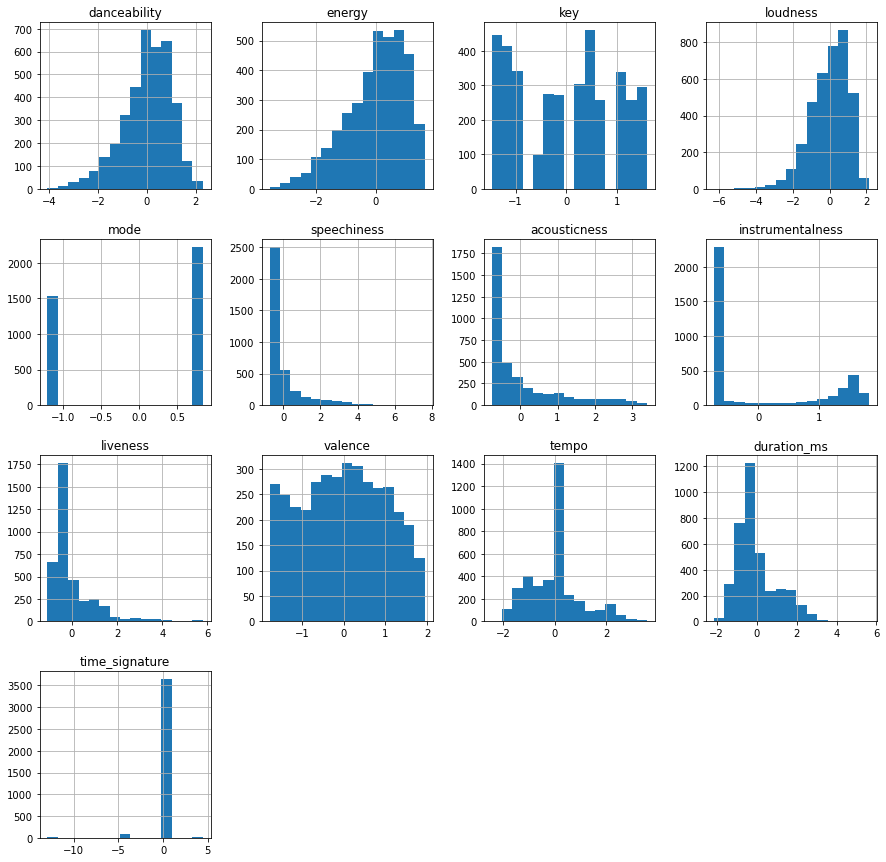

In [244]:
all_df_4_scaled_df.hist(bins=15, figsize=(15,15));

# Finding the optimal K

In [245]:
kmeans.inertia_

42946832102.35966

In [246]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(all_df_4)
print(kmeans.inertia_)

2302126414036.34


In [247]:
K= range(16,50)

In [248]:
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(all_df_4)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[282074519212.9764, 249863281772.64642, 218507743442.42093, 197689381566.5128, 179620535080.75714, 162336882745.41205, 146288391793.48547, 133679453342.13069, 123394961770.71707, 111798614932.75151, 103284208218.42691, 96710815720.34723, 91396865221.77448, 83400989030.02036, 78589204616.8597, 73447046513.32239, 68492529264.2198, 63932273779.56746, 60180702029.97256, 54687802818.90204, 52790924844.684204, 49884537919.35776, 47260641354.7227, 45937205036.33078, 42664204891.55602, 40660927931.96574, 38300816311.603004, 36849243915.2406, 34994115765.753365, 33406488329.13992, 31341016669.794395, 29470509177.085796, 29081588418.909786, 27767726747.41699]


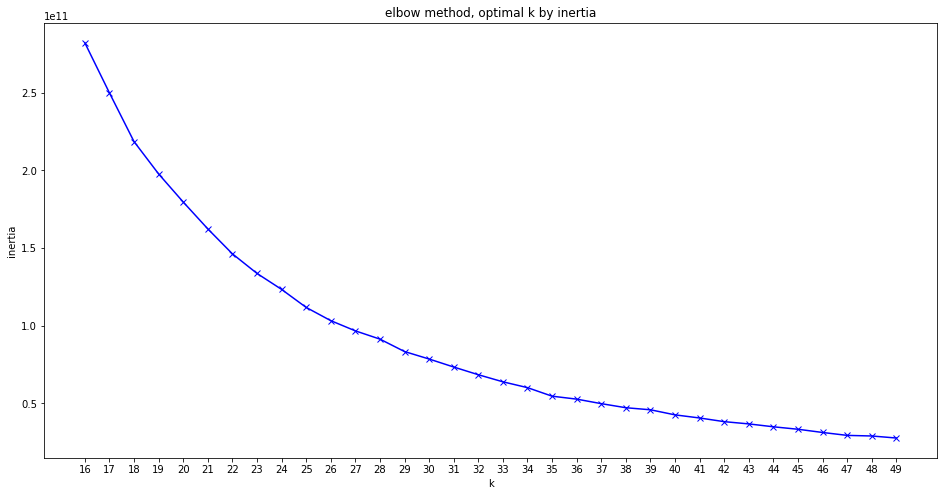

In [249]:
# plot the results

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

# CLUSTERING TRY 2

In [285]:
kmeans=KMeans(n_clusters=28)
#have to set a starting cluster number 

In [286]:
cluster_2=kmeans.fit(all_df_4)

In [287]:
cluster_2.labels_

array([ 0,  0, 21, ..., 19, 11,  1], dtype=int32)

In [288]:
#bring cluster into data frame
all_df_4_copy=all_df_4.copy()
all_df_4_copy['cluster']=cluster_2.labels_

In [289]:
all_df_4_copy.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.589,134.002,211560,4,0
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.744,116.883,216319,4,0
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.240,148.114,222200,4,21
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.671,168.766,155973,4,3
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.687,102.052,174118,4,6


In [290]:
all_df_4_copy

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,134.002,211560,4,0
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.7440,116.883,216319,4,0
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.2400,148.114,222200,4,21
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.6710,168.766,155973,4,3
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.6870,102.052,174118,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,0.751,0.739,5,-8.557,0,0.0380,0.01450,0.884000,0.0902,0.0988,123.023,255630,4,20
3759,0.619,0.746,7,-10.770,1,0.0407,0.11600,0.880000,0.1370,0.1700,122.005,287213,4,25
3760,0.781,0.658,1,-10.312,1,0.0446,0.03060,0.742000,0.1120,0.1060,124.017,418065,4,19
3761,0.792,0.932,10,-6.781,1,0.0500,0.00117,0.916000,0.0723,0.3560,120.997,388696,4,11


### Visually explore the clusters

<AxesSubplot:xlabel='energy', ylabel='liveness'>

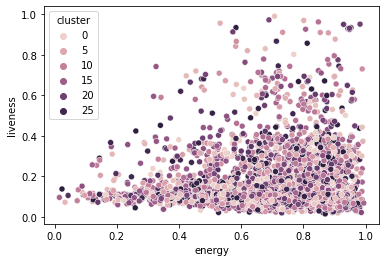

In [291]:
sns.scatterplot(data=all_df_4_copy, x="energy", y="liveness",hue='cluster')

### 3-D plotting with plotly 

In [292]:
markersize= all_df_4_copy['tempo']
markercolour= all_df_4_copy['cluster']

fig1=go.Scatter3d(x=all_df_4_copy['danceability'],
                  y=all_df_4_copy['energy'],
                  z=all_df_4_copy['acousticness'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Blues'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="danceability"),
                              yaxis=dict(title='energy'),
                              zaxis=dict(title='acousticness')))

In [293]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

# Getting the final DF with the cluster and features

In [294]:
all_df_4_copy

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,134.002,211560,4,0
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.7440,116.883,216319,4,0
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.2400,148.114,222200,4,21
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.6710,168.766,155973,4,3
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.6870,102.052,174118,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,0.751,0.739,5,-8.557,0,0.0380,0.01450,0.884000,0.0902,0.0988,123.023,255630,4,20
3759,0.619,0.746,7,-10.770,1,0.0407,0.11600,0.880000,0.1370,0.1700,122.005,287213,4,25
3760,0.781,0.658,1,-10.312,1,0.0446,0.03060,0.742000,0.1120,0.1060,124.017,418065,4,19
3761,0.792,0.932,10,-6.781,1,0.0500,0.00117,0.916000,0.0723,0.3560,120.997,388696,4,11


In [295]:
cluster_column = all_df_4_copy['cluster'].to_list()
song_name = big_df['song_name'].to_list()
song_artist = big_df['song_artist'].to_list()
songid_column = big_df['song_ID'].to_list()
Genre_column = big_df['Genre'].to_list()

final_df=pd.DataFrame({'song_name':song_name, 'song_ID':songid_column, 
                       'song_artist':song_artist, 'Genre':Genre_column, 'cluster':cluster_column})



In [296]:
final_df

,song_name,song_ID,song_artist,Genre,cluster
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie,0
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie,0
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie,21
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie,3
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie,6
...,...,...,...,...,...
3758,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn,Techno,20
3759,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation,Techno,25
3760,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea,Techno,19
3761,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage,Techno,11


## Testing the product

In [373]:
song= input("Give us a song name to get a recommendation!: ")

check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]
index = check.index.tolist()

if len(index) == 0:
    print("This song is not on the Top 100 hot playlist! ")
    
else:
    answer = input("Do you mean " + songs_top100.Title[index].values[0] + " by " + songs_top100.Artist[index].values[0] + "?")

    if answer.lower() == 'yes':
        suggestion = songs_top100.sample().index.tolist()
        print("Nice! This is a hot song! You might also like " + songs_top100['Title'][suggestion].item() + " by " + songs_top100['Artist'][suggestion].item())

    else:
        print("that song is not in the playlist, try another song!")
        
        

Give us a song name to get a recommendation!: shivers
Do you mean Shivers by Ed Sheeran?yes
Nice! This is a hot song! You might also like Already Dead by Juice WRLD


In [406]:
## test 2 MI CODIGO

song= input("Give us a song name to get a recommendation!: ")

check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]
index = check.index.tolist()


if len(index) == 0:
    print("This song is not on the Top 100 hot playlist! Let me check on Spotify ")
    
# go to Spotify 
spotify = final_df[final_df['song_name'].str.lower().str.replace(" "," ").str.contains(song)]

index = spotify.index.tolist()

# suggest another song of spotify

if len(index) == 0:
    print("Dont have this song!")
    
else:
    answer = input("The song you want is "+final_df.song_name[index].values[0] +"'by'"+ final_df.song_artist[index].values[0]+"? (Yes/No)")
    
    if answer.lower() == 'yes':
        song_cluster = final_df.cluster[index].values[0]
        suggestion = final_df[final_df['cluster'] == song_cluster].sample().index.tolist()
        print('Nice! You might also like: '+ final_df['song_name']
              [suggestion].item()+ "'by'"+final_df['song_artist'][suggestion].item())                   
    else:
        print('Dont know that song, try another one!')
    
# if its on the top100

    if answer.lower() == 'yes':
        suggestion = songs_top100.sample().index.tolist()
        print("Nice! This is a hot song! You might also like " + songs_top100['Title'][suggestion].item() + 
              " by " + songs_top100['Artist'][suggestion].item())
    else:
        print("That song is not in the playlist, try another song!")
        

Give us a song name to get a recommendation!: zapatillas
This song is not on the Top 100 hot playlist! Let me check on Spotify 
The song you want is Zapatillas'by'El Canto Del Loco? (Yes/No)yes
Nice! You might also like: High And Low'by'Sam Feldt
Nice! This is a hot song! You might also like Happier Than Ever by Billie Eilish


In [ ]:
## test 2 MI CODIGO COPY!!!!!

song= input("Give us a song name to get a recommendation!: ")

check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]
index = check.index.tolist()


if len(index) == 0:
    print("This song is not on the Top 100 hot playlist! Let me check on Spotify ")
    
# go to Spotify 
spotify = final_df[final_df['song_name'].str.lower().str.replace(" "," ").str.contains(song)]

index = spotify.index.tolist()

# suggest another song of spotify

if len(index) == 0:
    print("Dont have this song!")
    
else:
    answer = input("The song you want is "+final_df.song_name[index].values[0] +"'by'"+ final_df.song_artist[index].values[0]+"? (Yes/No)")
    
    if answer.lower() == 'yes':
        song_cluster = final_df.cluster[index].values[0]
        suggestion = final_df[final_df['cluster'] == song_cluster].sample().index.tolist()
        print('Nice! You might also like: '+ final_df['song_name']
              [suggestion].item()+ "'by'"+final_df['song_artist'][suggestion].item())                   
    else:
        print('Dont know that song, try another one!')
    
# if its on the top100

    if answer.lower() == 'yes':
        suggestion = songs_top100.sample().index.tolist()
        print("Nice! This is a hot song! You might also like " + songs_top100['Title'][suggestion].item() + 
              " by " + songs_top100['Artist'][suggestion].item())
    else:
        print("That song is not in the playlist, try another song!")
        

In [ ]:
final_df[final_df['song_name']=='stay']['cluster']

In [399]:
#verify if value is in the df and cluster
final_df.loc[final_df['song_name'] == "Montrose Ave"]

,song_name,song_ID,song_artist,Genre,cluster
906,Montrose Ave,1kFu2TuUmsARXGYc2eYXiC,Y.V.E. 48,Tropical,17


In [400]:
final_df.loc[final_df['song_name'] == "Zapatillas"]

,song_name,song_ID,song_artist,Genre,cluster
1608,Zapatillas,42VgiRyg0YjtRVLiPFNxPJ,El Canto Del Loco,Spanish,17
1630,Zapatillas,6yVTl3yEdpwQmFT9PtBMc5,El Canto Del Loco,Spanish,17


### I put into "Raw NBConvert" some lines to make the notebook easily to read